Let's start with two basic model runs, one w/ ABIFM and the other with singular approach, each with a single monomodal INP population.

In [1]:
from init_model import ci_model
import numpy as np

# ABIFM
model_abifm = ci_model(use_ABIFM=True,
                 entrain_from_cth=False,
                 inp_info=[{"name": "Al2O3_1",                # INP population #1 properties
                            "n_init_max": 2.,
                            "psd": {"type": "mono",
                                   "diam": 1.},                            
                            "nucleus_type": "Al2O3"}],
                 t_harvest=3600*3)                               # True - run model after initialization

# Singular
model_singular = ci_model(use_ABIFM=False,
                 entrain_from_cth=False,
                 inp_info=[{"name": "Al2O3_1",                # INP population #1 properties
                            "n_init_max": 2.,
                            "psd": {"type": "mono",
                                   "diam": 1.},                            
                            "nucleus_type": "Al2O3"}],
                 t_harvest=3600*3)                               # True - run model after initialization

Model initalization done! Total processing time = 0.434139 s
10% of model run completed. Elapsed time: 0.56 s.
20% of model run completed. Elapsed time: 1.16 s.
30% of model run completed. Elapsed time: 1.77 s.
40% of model run completed. Elapsed time: 2.36 s.
50% of model run completed. Elapsed time: 2.94 s.
60% of model run completed. Elapsed time: 3.51 s.
70% of model run completed. Elapsed time: 4.10 s.
80% of model run completed. Elapsed time: 4.76 s.
90% of model run completed. Elapsed time: 5.32 s.

Model run finished! Total run time = 5.940021 s
Model run time stats:
Process: activation_inp: 0.91 s (15.37% of of total time)
Process: entrainment_inp: 0.60 s (10.09% of of total time)
Process: mixing_inp: 0.70 s (11.75% of of total time)
Process: sedimentation_ice: 0.65 s (10.93% of of total time)
Process: mixing_ice: 0.56 s (9.48% of of total time)
Process: data_allocation: 2.51 s (42.33% of of total time)
Model initalization done! Total processing time = 0.362988 s
10% of model 

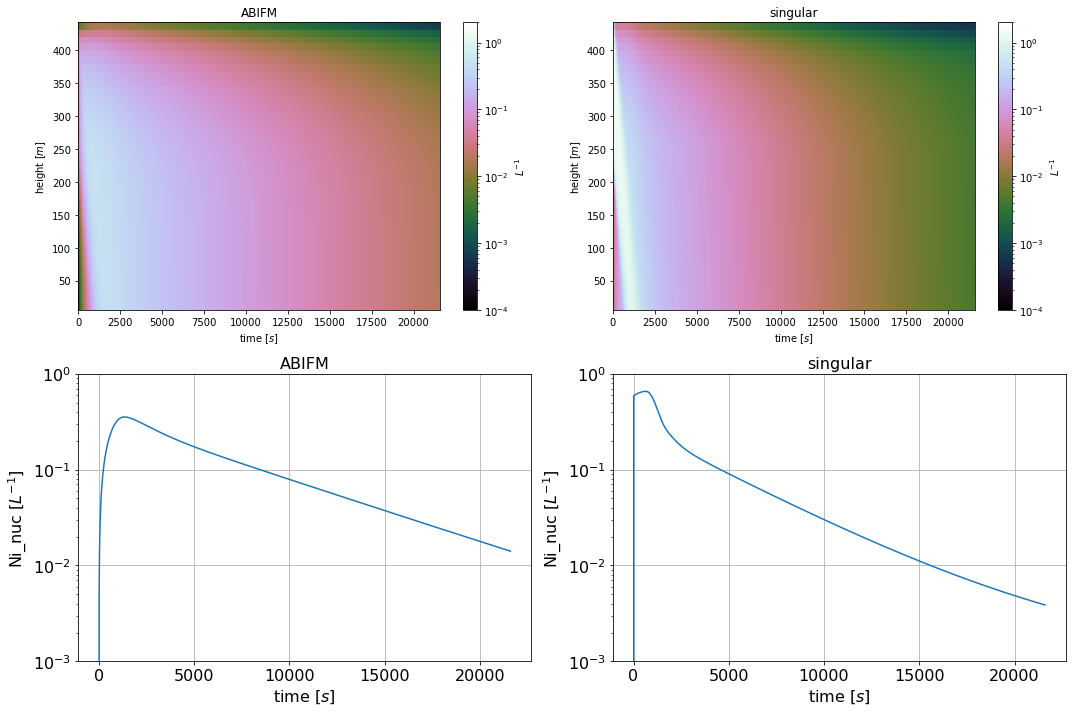

In [5]:
cb = {}
xticks = np.linspace(0, 2, 2)
fig, ax = model_abifm.plot.generate_figure(subplot_shape=(2,2))
ax[0,0], cb["sub0"] = model_abifm.plot.curtain(model_abifm, ax=ax[0,0], field_to_plot="Ni_nuc", vmin=1e-4, vmax=2e0, log_plot=True, title="ABIFM")
ax[0,1], cb["sub1"] = model_abifm.plot.curtain(model_singular, ax=ax[0,1], field_to_plot="Ni_nuc", vmin=1e-4, vmax=2e0, log_plot=True, title="singular")
ax[1,0] = model_abifm.plot.tseries(model_abifm, ax=ax[1,0], field_to_plot="Ni_nuc", grid=True, yscale="log", ylim=[1e-3, 1], title="ABIFM")
ax[1,1] = model_abifm.plot.tseries(model_singular, ax=ax[1,1], field_to_plot="Ni_nuc", grid=True, yscale="log", ylim=[1e-3, 1], title="singular")

In [8]:
from init_model import ci_model
import numpy as np

model = ci_model(final_t=3600*2,                               # 1D model simulation time
                 delta_t=10,                                   # ∆t in s
                 use_ABIFM=True,                               # True - ABIFM, False - singular
                 t_averaged_les=False,                         # True - time-averaged LES, False - LES evolution informs 1d model
                 custom_vert_grid=np.arange(0., 500.+1., 10.), # None - use LES vertical grid, np.ndarray - custom vertical grid
                 w_e_ent=0.1e-3,                               # cloud-top entrainment value or time series
                 mixing_bounds=(0, "ql_cbh"),                  # Mixing layer bounds (base, top) in m ("ql_cbh" for cloud base/top)
                 entrain_from_cth=True,                        # True - from cloud top, False domain top (infinite source)
                 tau_mix=1800.,                                # Mixing time scale value or time series
                 v_f_ice=0.3,                                  # number-weighted fall velocity (value, t-series, or curtain)
                 in_cld_q_thresh=1e-3,                         # mixing ratio threshold for determining a cloud [g/kg]
                 inp_info=[{"name": "Illite_mono",             # INP population #1 properties
                            "n_init_max": 2.,
                            "psd": {"type": "mono",
                                   "diam": 1.},                            
                            "nucleus_type": "Illite",
                            "n_init_weight_prof":
                            {"height": np.array([0, 100, 150, 200, 500]),
                            "weight": np.array([0.8, 1., 1., 0.2, 0.1])}},
                           {"name": "Kaolinite",               # INP population #2 properties
                            "n_init_max": 1.5,
                            "psd": {"type": "logn",
                                   "diam_mean": 0.8,
                                   "geom_sd": 1.5,
                                   "n_bins": 40,
                                   "diam_min": 0.05,
                                   "m_ratio": 1.5},                            
                            "nucleus_type": "Kaolinite"},
                           {"name": "Al2O3_default",            # INP population #4 properties
                            "n_init_max": 1.5,
                            "psd": {"type": "default"},                            
                            "nucleus_type": "Al2O3",
                            "n_init_weight_prof":
                            {"height": np.array([0, 300, 350, 400, 500]),
                            "weight": np.array([0., 0.1, 1.4, 1.0, 0.1])}},
                           {"name": "Al2O3_custom",            # INP population #3 properties
                            "n_init_max": 1,
                            "psd": {"type": "custom",
                                   "diam": [0.1, 0.3, 1., 2., 10.],
                                   "dn_dlogD": [0.2, 0.1, 0.6, 0.1, 0.05],
                                   "norm_to_n_init_max": True},                            
                            "nucleus_type": "Al2O3"}
                            ],
                 les_out_path=None,                            # path of LES output sounding file to inform the model
                 les_out_filename=None,                        # filename of LES sounding file to inform the model
                 t_harvest=(0, 3600*6),                        # time(s) to harvest from the LES model output 
                 height_ind_2crop=600.,                        # height indices or vals for LES cropping ("ql_pbl": use ql thresh)
                 cbh_det_method="ql_cbh",                      # Method to detect cloud base (currently, only with a ql thresh)
                 run_model=True)                               # True - run model after initialization
#model.ds


Some heights were omitted because they are outside the processed LES dataset grid
Model initalization done! Total processing time = 1.534903 s
10% of model run completed. Elapsed time: 0.60 s.
20% of model run completed. Elapsed time: 1.20 s.
30% of model run completed. Elapsed time: 1.86 s.
40% of model run completed. Elapsed time: 2.46 s.
50% of model run completed. Elapsed time: 3.08 s.
60% of model run completed. Elapsed time: 3.73 s.
70% of model run completed. Elapsed time: 4.31 s.
80% of model run completed. Elapsed time: 4.97 s.
90% of model run completed. Elapsed time: 5.57 s.

Model run finished! Total run time = 6.196893 s
Model run time stats:
Process: activation_inp: 1.29 s (20.78% of of total time)
Process: entrainment_inp: 0.64 s (10.34% of of total time)
Process: mixing_inp: 1.69 s (27.35% of of total time)
Process: sedimentation_ice: 0.23 s (3.73% of of total time)
Process: mixing_ice: 0.19 s (3.09% of of total time)
Process: data_allocation: 2.14 s (34.57% of of total

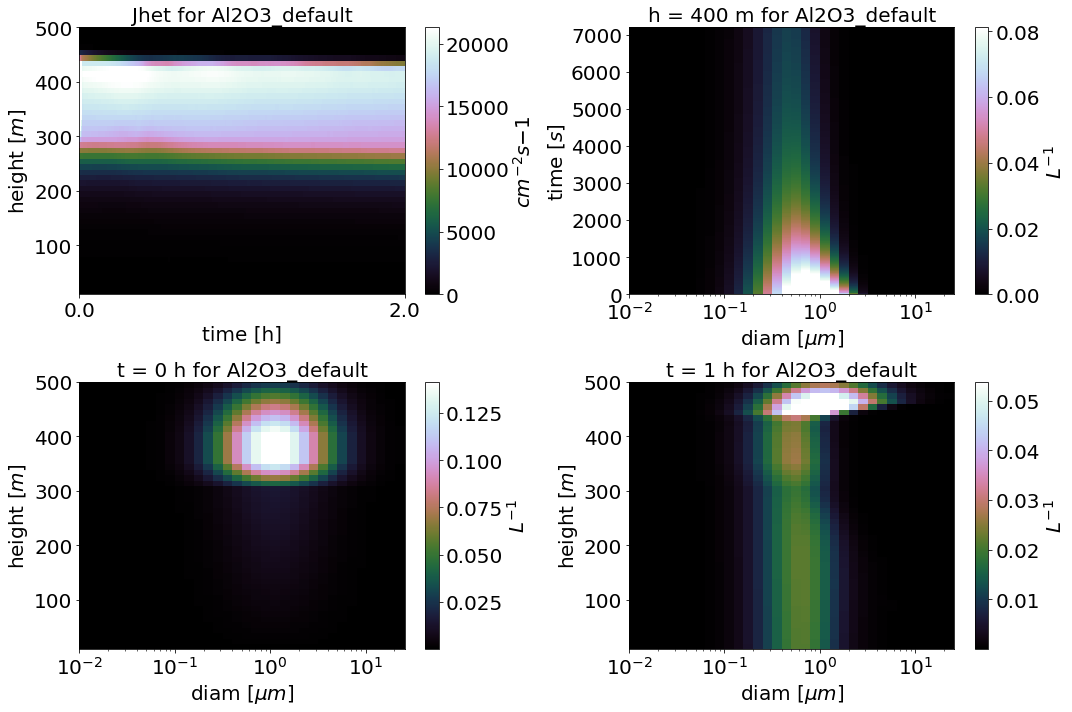

In [9]:
cb = {}
xticks = np.linspace(0, 2, 2)
fig, ax = model.plot.generate_figure(subplot_shape=(2,2))
ax[0,0], cb["sub0"] = model.plot.curtain(model, ax=ax[0,0], which_inp="Al2O3_default", field_to_plot="Jhet", font_size=20, vmin=0, xtick=xticks*3600, xticklabel=xticks, xlabel="time [h]", title="Jhet for Al2O3_default")
ax[0,1], cb["sub1"] = model.plot.curtain(model, ax=ax[0,1], which_inp="Al2O3_default", font_size=20, x="diam", y="time", inp_z=400., title="h = 400 m for Al2O3_default")
ax[1,0], cb["sub2"] = model.plot.curtain(model, ax=ax[1,0], which_inp="Al2O3_default", font_size=20, x="diam", inp_z=0., title="t = 0 h for Al2O3_default")
ax[1,1], cb["sub3"] = model.plot.curtain(model, ax=ax[1,1], which_inp="Al2O3_default", font_size=20, x="diam", inp_z=3600.,xscale="log", title="t = 1 h for Al2O3_default")


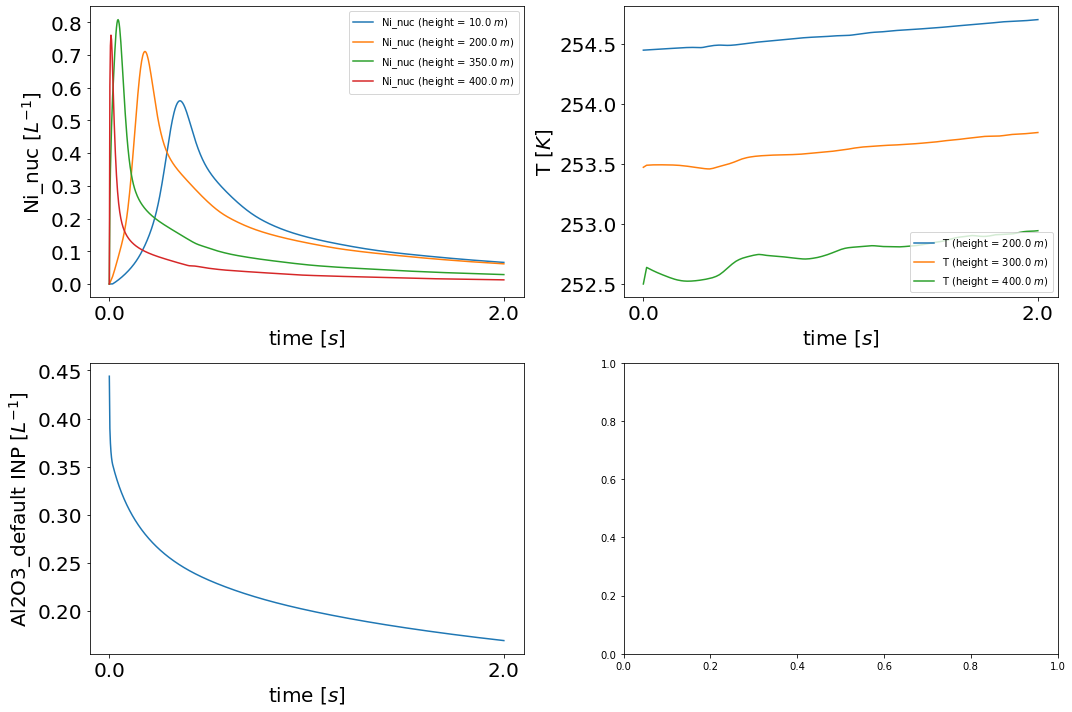

In [10]:
cb = {}
xticks = np.linspace(0, 2, 2)
fig, ax = model.plot.generate_figure(subplot_shape=(2,2))
ax[0,0] = model.plot.tseries(model, ax=ax[0,0], font_size=20, field_to_plot="Ni_nuc", xtick=xticks*3600, xticklabel=xticks, Height=[0., 200., 350., 400.], Height_dim_treat=None)
ax[0,1] = model.plot.tseries(model, ax=ax[0,1], font_size=20, field_to_plot="T", Height=[200., 300., 400.], xtick=xticks*3600, xticklabel=xticks, Height_dim_treat=None)
ax[1,0] = model.plot.tseries(model, ax=ax[1,0], which_inp="Al2O3_default", font_size=20, xtick=xticks*3600, xticklabel=xticks)


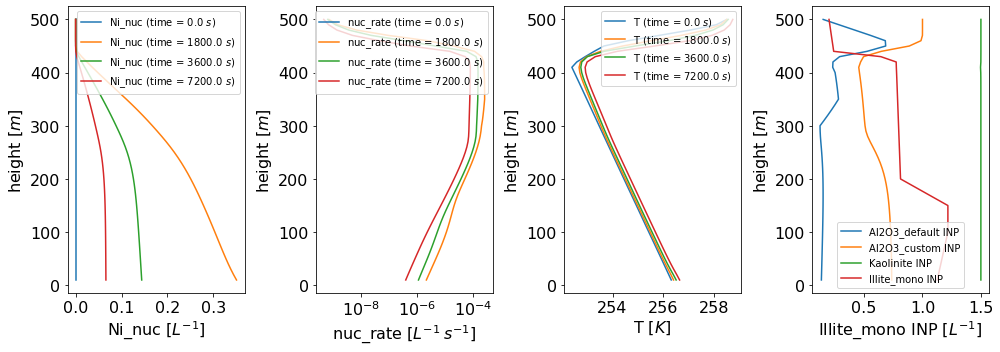

In [12]:
cb = {}
xticks = np.linspace(0, 2, 5)
fig, ax = model.plot.generate_figure(subplot_shape=(1,4), figsize=(14,5))
ax[0] = model.plot.profile(model, ax=ax[0], field_to_plot="Ni_nuc", Time=[0., 1800., 3600., 7200.], Time_dim_treat=None)
ax[1] = model.plot.profile(model, ax=ax[1], field_to_plot="nuc_rate", xscale="log", Time=[0., 1800., 3600., 7200.], Time_dim_treat=None)
ax[2] = model.plot.profile(model, ax=ax[2], field_to_plot="T", Time=[0., 1800., 3600., 7200.], Time_dim_treat=None)
ax[3] = model.plot.profile(model, ax=ax[3], which_inp="Al2O3_default")
ax[3] = model.plot.profile(model, ax=ax[3], which_inp="Al2O3_custom")
ax[3] = model.plot.profile(model, ax=ax[3], which_inp="Kaolinite")
ax[3] = model.plot.profile(model, ax=ax[3], which_inp="Illite_mono", legend=True)